# Barabási–Albert model

Barabási–Albert (BA) model adalah algoritme untuk membentuk _random scale-free network_ dengan mekanisme _preferential attachment_. Beberapa sistem, seperti internet, jejaring sosial diperkirakan _scale-free_. Sebagian kecil node (disebut hub) punya derajat yang sangat tinggi dibandingkan dengan node lain dalam jaringan.

## Scale-free

Scale-free network = jaringan dengan _degree distribution_ (jumlah koneksi) dari node-node dalam jaringan mengikuti hukum pangkat (_power-law distribution_). Maksudnya
- Sebagian besar node dalam jaringan memiliki derajat yang sangat rendah (hanya beberapa koneksi).
- Sejumlah kecil node memiliki derajat yang sangat tinggi (sangat banyak koneksi). Node-node ini adalah "hub.

"Scale-free" pada dasarnya berarti tidak ada "skala" atau "ukuran" yang tipikal atau dominan untuk jumlah koneksi sebuah node. 

Misalnya dengan analogi tinggi badan semua orang dewasa di kota, tinggi rata-rata, misalnya 165 cm. Kebanyakan orang akan memiliki tinggi badan yang tidak jauh berbeda dengan rata-rata ini. Jika digambarkan distribusinya akan berbentuk seperti lonceng (distribusi normal/Gaussian). Ada "skala" atau "ukuran" yang jelas dan tipikal.

Berbeda dengan misalnya kekayaan di dunia. Mayoritas besar orang punya kekayaan yang relatif sedikit atau sedang. Segelintir kecil orang (miliarder) punya kekayaan yang luar biasa besar. Rata-rata kekayaan tidak benar-benar emnggambarkan kondisi kebanyakan orang dan tidak menggambarkan betapa kayanya segelintir orang itu.


## Preferential attachment

Preferential attachment = mekanisme di mana node baru cenderung lebih terhubung dengan node dengan derajat yang tinggi. Analogi sederhananya untuk jejaring sosial, "yang populer makin populer". Semisal ada sebuah pesta, ada beberapa orang yang saling mengobrol (ini adalah jaringan yang sudah ada). Tamu baru datang ke pesta (node baru yang mau bergabung) lebih tertarik untuk mendekati dan mengobrol dengan orang/kelompok orang yang sudah ramai dikelilingi banyak orang lain.

Akibatnya:
- Orang yang sudah populer (node yang sudah punya banyak koneksi) akan lebih mudah mendapatkan teman baru lagi.
- Orang yang kurang populer (node dengan koneksi sedikit) akan lebih sulit mendapatkan teman baru.

## Algoritme

Parameter dari BA model adalah $m$, integer positif.
1. Mulai (inisialisasi) dari $m$ node yang saling terhubung. $m_0 \ge m$
2. Pada setiap langkah, tambah satu node. Node baru ini membuat $m$ koneksi ke node-node yang sudah ada.
3. Peluang terhubung ke node lama lebih besar jika node lama tersebut punya lebih banyak koneksi.
4. Ulangi sampai jumlah node tercapai.

Formula umumnya untuk setiap langkah:

$$
p_i = \frac{k_i}{\sum_j k_j}
$$

$p_i$ adalah probabilitas untuk node baru akan terhubung ke node $i$ yang sudah ada.

$k_i$ adalah jumlah koneksi (derajat) dari node $i$.

$\sum_j k_j$ adalah total derajat dari semua node yang sudah ada.
Misalnya, jika ada 3 node: A (2 koneksi), B (1 koneksi), C (1 koneksi).
Total derajat = 2 + 1 + 1 = 4.

Informasi Graf Barabási-Albert dengan m berbeda:

--- Graf dengan m = 1 ---
Jumlah Node: 30
Jumlah Edge: 29
Derajat Rata-rata: 1.93

--- Graf dengan m = 2 ---
Jumlah Node: 30
Jumlah Edge: 56
Derajat Rata-rata: 3.73

--- Graf dengan m = 3 ---
Jumlah Node: 30
Jumlah Edge: 81
Derajat Rata-rata: 5.40

--- Graf dengan m = 4 ---
Jumlah Node: 30
Jumlah Edge: 104
Derajat Rata-rata: 6.93


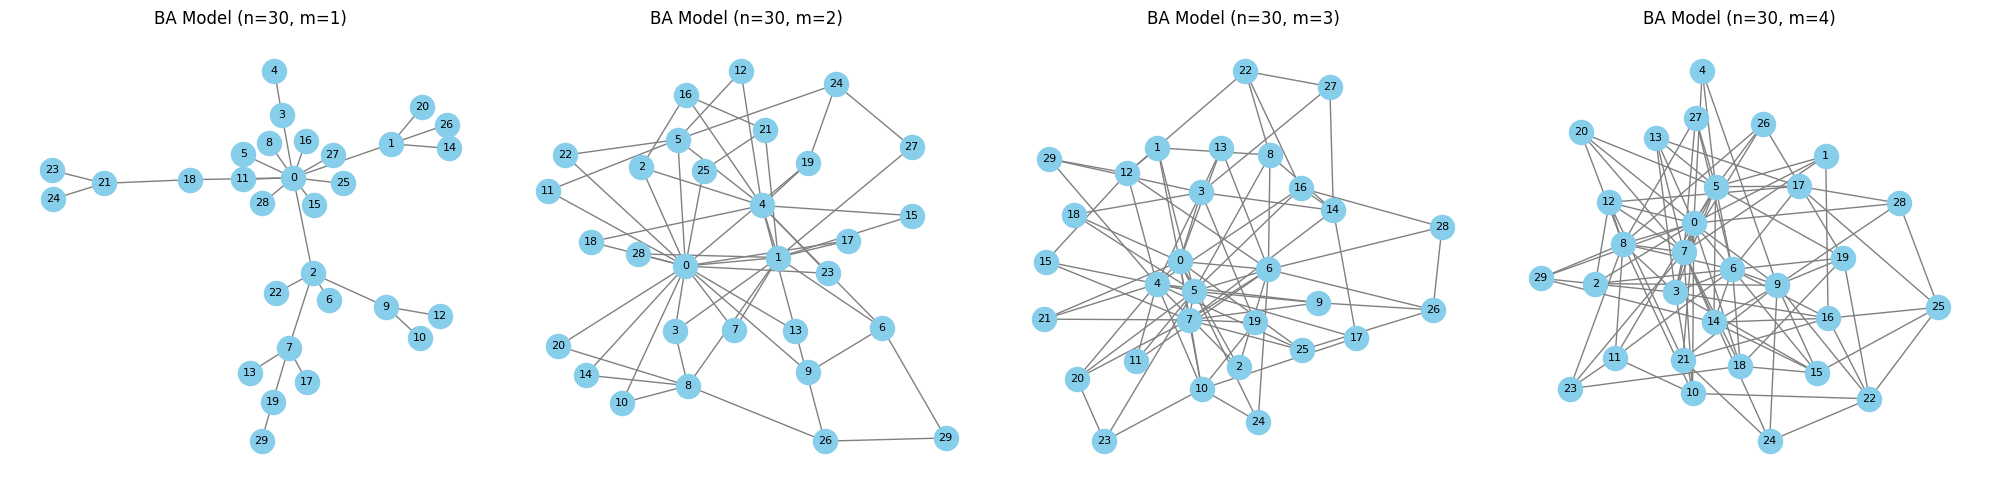


Distribusi Derajat:
m=1: Derajat maksimum = 12
m=2: Derajat maksimum = 18
m=3: Derajat maksimum = 15
m=4: Derajat maksimum = 17


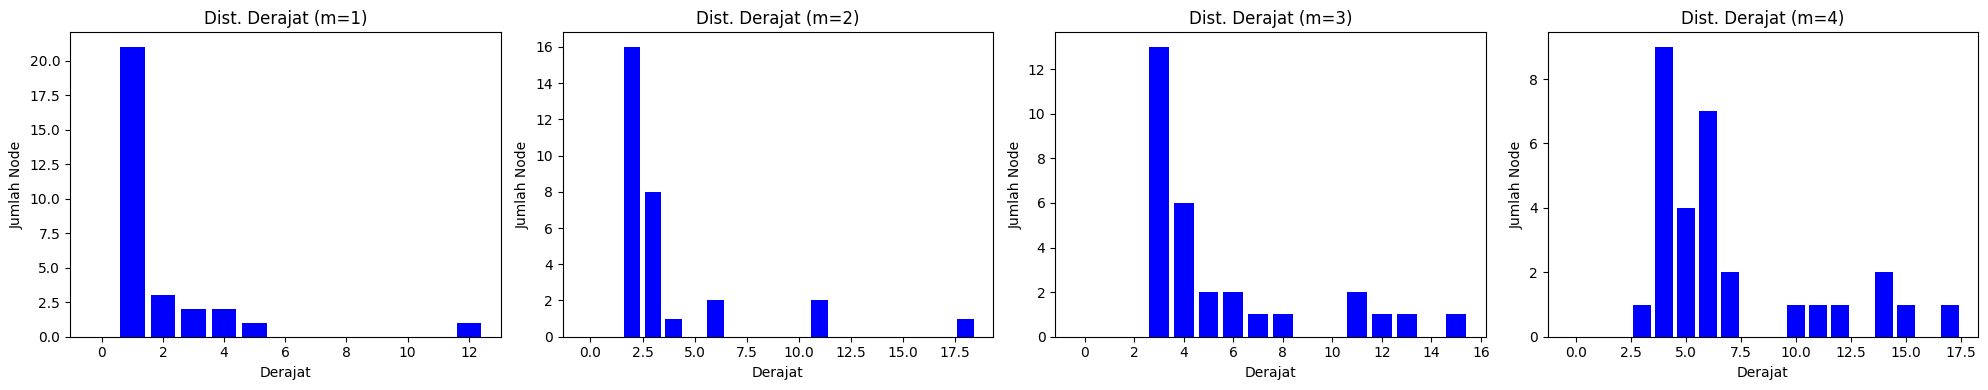

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Parameter umum
n_nodes = 30  # Jumlah total node dalam graf akhir
seed_value = 42 # Seed untuk reproduktifitas layout

# Nilai m yang akan diuji
m_values = [1, 2, 3, 4]

# Membuat subplot untuk menampilkan graf
fig, axes = plt.subplots(1, len(m_values), figsize=(5 * len(m_values), 5))
# Jika hanya satu nilai m, axes tidak akan menjadi array, jadi kita buat jadi array
if len(m_values) == 1:
    axes = [axes]

print("Informasi Graf Barabási-Albert dengan m berbeda:")
print("==============================================")

for i, m_val in enumerate(m_values):
    # Membuat graf Barabási-Albert
    # Catatan: Graf BA dimulai dengan m0 = m node
    G = nx.barabasi_albert_graph(n_nodes, m_val, seed=seed_value)

    # Informasi dasar graf
    print(f"\n--- Graf dengan m = {m_val} ---")
    print(f"Jumlah Node: {G.number_of_nodes()}")
    print(f"Jumlah Edge: {G.number_of_edges()}")
    avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
    print(f"Derajat Rata-rata: {avg_degree:.2f}")

    # Menggambar graf
    ax = axes[i]
    pos = nx.spring_layout(G, seed=seed_value)  # Layout graf
    nx.draw(G, pos, ax=ax, with_labels=True, node_size=300, node_color='skyblue', font_size=8, edge_color='gray')
    ax.set_title(f"BA Model (n={n_nodes}, m={m_val})")

plt.tight_layout() # Menyesuaikan layout plot agar tidak tumpang tindih
plt.show()

# Analisis tambahan: Distribusi Derajat (opsional)
fig_dist, axes_dist = plt.subplots(1, len(m_values), figsize=(5 * len(m_values), 4))
if len(m_values) == 1:
    axes_dist = [axes_dist]

print("\nDistribusi Derajat:")
print("===================")
for i, m_val in enumerate(m_values):
    G = nx.barabasi_albert_graph(n_nodes, m_val, seed=seed_value)
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degree_counts = nx.degree_histogram(G)

    ax_dist = axes_dist[i]
    ax_dist.bar(range(len(degree_counts)), degree_counts, width=0.80, color="b")
    ax_dist.set_title(f"Dist. Derajat (m={m_val})")
    ax_dist.set_xlabel("Derajat")
    ax_dist.set_ylabel("Jumlah Node")
    print(f"m={m_val}: Derajat maksimum = {max(degree_sequence if degree_sequence else [0])}")

plt.tight_layout()
plt.show()